# Save downscaled images to specified directory

In [2]:
import sys
sys.path.append('..')

In [4]:
from src import dataset
import importlib
importlib.reload(dataset)

from src import datahelper as dh
importlib.reload(dh)

from torchvision.utils import save_image

In [3]:
# # for_diffusion=True means that we don't use data augmentation when loading images
# dl, sizes, classes = dataset.load_downscaled_xray_data("../data/chest_xray", for_diffusion=True, batch_size=8, return_val_set=False, load_as_rgb=False)

In [6]:
dl = dh.load_fashion_mnist_from_torch(batch_size=8)

In [9]:
dl.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [13]:
def save_n_images(dataloader, n, save_dir, image_key=0, label_key=1):
    # Save n images from the provided dataloader to specified path
    n_saved = 0
    for i, batch in enumerate(dataloader):
        # Save each image in batch
        for j, (image, label) in enumerate(zip(batch[image_key], batch[label_key])):
            save_image(image, f"{save_dir}/{label}-{i}-{j}.png")
            n_saved += 1
            if n_saved >= n:
                return

In [11]:
!ls ../data/metric-comparison/fmnist/real
# !rm ../data/metric-comparison/fmnist/real-train/*

0-0-18.png  2-0-47.png	3-0-71.png  6-0-15.png	7-0-11.png  8-0-51.png
0-0-24.png  2-0-57.png	3-0-85.png  6-0-17.png	7-0-12.png  8-0-56.png
0-0-35.png  2-0-61.png	3-0-90.png  6-0-19.png	7-0-1.png   8-0-69.png
0-0-39.png  2-0-81.png	3-0-91.png  6-0-30.png	7-0-25.png  8-0-73.png
0-0-3.png   2-0-84.png	4-0-42.png  6-0-34.png	7-0-2.png   8-0-93.png
0-0-88.png  3-0-0.png	4-0-4.png   6-0-36.png	7-0-45.png  8-0-99.png
0-0-89.png  3-0-16.png	4-0-53.png  6-0-43.png	7-0-60.png  9-0-28.png
1-0-10.png  3-0-22.png	4-0-65.png  6-0-52.png	7-0-63.png  9-0-33.png
1-0-29.png  3-0-23.png	4-0-70.png  6-0-55.png	7-0-74.png  9-0-49.png
1-0-32.png  3-0-31.png	4-0-79.png  6-0-58.png	7-0-77.png  9-0-64.png
1-0-40.png  3-0-37.png	4-0-9.png   6-0-59.png	7-0-86.png  9-0-66.png
1-0-76.png  3-0-38.png	5-0-26.png  6-0-5.png	7-0-87.png  9-0-67.png
1-0-82.png  3-0-46.png	5-0-78.png  6-0-68.png	7-0-95.png  9-0-72.png
2-0-13.png  3-0-48.png	5-0-7.png   6-0-80.png	8-0-14.png  9-0-75.png
2-0-20.png  3-0-54.png	5-0-8.png   6

In [10]:
dl

In [13]:
# train_dl = dl["train"]
# test_dl = dl["test"]

# save_n_images(train_dl, 1000, "../data/metric-comparison/xray/real-train-no-aug")
# # 624 images in test set
# save_n_images(test_dl, 624, "../data/metric-comparison/xray/real-test")

In [14]:
save_n_images(dl, 1000, "../data/metric-comparison/fmnist/real")

## Save a plot that looks like the generated images for comparison

In [33]:
train_dl = dl["test"]
# Get 10 images and labels and plot them with labels
images, labels = next(iter(train_dl))
# Convert to numpy
images = images.numpy()[:10]
labels = list(labels.numpy()[:10])

In [34]:
type(images), type(labels)

(numpy.ndarray, list)

In [35]:
from src import viz

In [36]:
label_map = {0: "Normal", 1: "Pneumonia"}

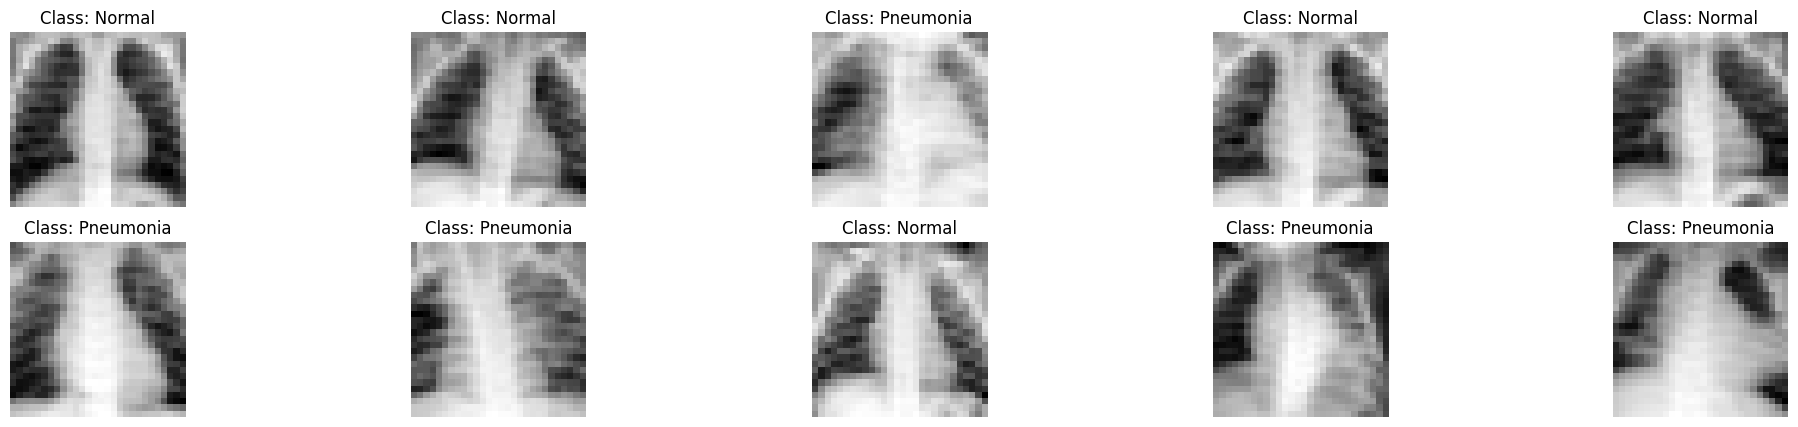

In [37]:
viz.plot_generated_images(images, labels, label_map, save_path="../results/diffusion/generated-images/real-images.png", show=True)